<a href="https://colab.research.google.com/github/AnnanyaV/Socio-Economic-Impact-of-Covid19/blob/main/Covid19VaccinesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the distribution of vaccines in different parts of India.

In [1]:
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.express as px

## Dataset-1 on Country wide India

In [5]:
gh_raw_csv_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv'

In [6]:
vaccines_india_df = pd.read_csv(gh_raw_csv_url)
vaccines_india_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0


In [7]:
vaccines_india_df.shape

(191, 7)

In [8]:
vaccines_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 191 non-null    object
 1   date                     191 non-null    object
 2   vaccine                  191 non-null    object
 3   source_url               191 non-null    object
 4   total_vaccinations       191 non-null    int64 
 5   people_vaccinated        191 non-null    int64 
 6   people_fully_vaccinated  191 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 10.6+ KB


In [9]:
vaccines_india_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,1.910000e+02,1.910000e+02,1.910000e+02
mean,1.541086e+08,1.248626e+08,2.924598e+07
std,1.393755e+08,1.109275e+08,2.877033e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.875160e+07,1.539676e+07,3.354844e+06
50%,1.327546e+08,1.135843e+08,1.917034e+07
75%,2.449457e+08,1.985355e+08,4.641018e+07
max,4.722236e+08,3.679946e+08,1.042291e+08


In [10]:
round(vaccines_india_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,191.0,1.541086e+08,1.393755e+08,0.0,18751603.5,132754608.0,244945654.5,472223639.0
people_vaccinated,191.0,1.248626e+08,1.109275e+08,0.0,15396759.0,113584269.0,198535473.0,367994586.0
people_fully_vaccinated,191.0,2.924598e+07,2.877033e+07,0.0,3354844.5,19170339.0,46410181.5,104229053.0


In [11]:
def datetime_split(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month

In [12]:

datetime_split(vaccines_india_df)

In [13]:

vaccines_india_df

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,year,month
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,2021,1
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,2021,1
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,2021,1
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,2021,1
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,2021,1
...,...,...,...,...,...,...,...,...,...
186,India,2021-07-27,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,446156659,349324061,96832598,2021,7
187,India,2021-07-28,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,450706257,352545271,98160986,2021,7
188,India,2021-07-29,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,456033754,356140739,99893015,2021,7
189,India,2021-07-30,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,461518479,359820313,101698166,2021,7


In [14]:
vaccines_india_df.groupby('month').agg({'total_vaccinations': 'median', 
                                        'people_vaccinated': 'median', 
                                        'people_fully_vaccinated': 'median'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
month,,,
1,1582201,1582201.0,0.0
2,8516771,8418653.0,98118.0
3,35064536,28862037.0,6202499.0
4,114493238,100179199.0,14314039.0
5,181897771,141448223.5,40449547.5
6,256815633,209136960.5,47678672.5
7,397519823,317390707.5,80129115.5
8,472223639,367994586.0,104229053.0


In [15]:
vaccines_india_df.groupby('month').agg({'total_vaccinations': 'mean', 
                                       'people_vaccinated': 'mean', 
                                       'people_fully_vaccinated': 'mean'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
month,,,
1,1.666071e+06,1.666071e+06,0.000000e+00
2,8.806005e+06,8.190648e+06,6.153570e+05
3,3.761312e+07,3.147027e+07,6.142853e+06
4,1.125233e+08,9.670344e+07,1.581990e+07
5,1.810848e+08,1.432658e+08,3.781903e+07
6,2.643352e+08,2.154857e+08,4.884952e+07
7,3.974892e+08,3.172208e+08,8.026842e+07
8,4.722236e+08,3.679946e+08,1.042291e+08


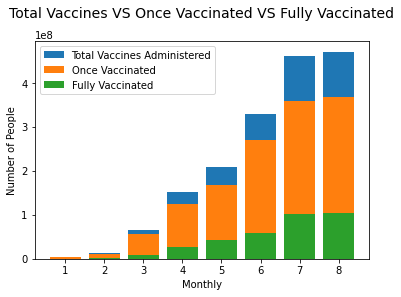

In [16]:
plt.bar(vaccines_india_df.month, vaccines_india_df.total_vaccinations, label='Total Vaccines Administered')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_vaccinated, label='Once Vaccinated')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_fully_vaccinated, label='Fully Vaccinated')

plt.title('Total Vaccines VS Once Vaccinated VS Fully Vaccinated', fontsize=14, y=1.08)
plt.xlabel('Monthly')
plt.ylabel('Number of People')
plt.legend();

In [17]:
px.bar(vaccines_india_df, 
       x=vaccines_india_df.month, 
       y=vaccines_india_df.total_vaccinations, 
       title="Total Vaccines Administered from 2021-01-15", 
       color="vaccine", 
       hover_data=['date'])


In [18]:
px.bar(vaccines_india_df, 
       x=vaccines_india_df.month, 
       y=vaccines_india_df.people_vaccinated, 
       title="Total People Vaccinated Once from 2021-01-15", 
       color="vaccine", 
       hover_data=['date'])

In [19]:
fig = px.bar(vaccines_india_df, 
             x=vaccines_india_df.month, 
             y=vaccines_india_df.people_fully_vaccinated, 
             title="Total People Fully Vaccinated from 2021-01-15", 
             color="vaccine", 
             hover_data=['date'])
# labels=dict(x='Monthly - 2021', y='Pople Fully Vaccinated', color='Vaccines Legend')
fig.show()


In [20]:
import plotly.graph_objects as go

In [21]:
fig = go.Figure(data=[
    go.Bar(name='Total Vaccines Administered', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.total_vaccinations, 
           hovertext=vaccines_india_df.date), 
    go.Bar(name='People Once Vaccinated', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.people_vaccinated, 
           hovertext=vaccines_india_df.date), 
    go.Bar(name='People Fully Vaccinated(Two doses)', 
           x=vaccines_india_df.month, 
           y=vaccines_india_df.people_fully_vaccinated, 
           hovertext=vaccines_india_df.date)
])

fig.update_xaxes(title='Monthly From January 2021')
fig.update_yaxes(title='Total Vaccines Administered, Once Vaccinated & Fully Vaccinated', 
                 title_font={'size': 12})
fig.update_layout(barmode='stack', 
                  title='Total Vaccines Administered VS Once Vaccinated VS Fully Vaccinated')
fig.show()

In [22]:
import numpy as np

In [23]:
vaccinations_pivot = pd.pivot_table(vaccines_india_df, 
                                    values=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'], 
                                    columns='month', 
                                    aggfunc={
                                        'total_vaccinations': np.median,
                                        'people_vaccinated': np.median,
                                        'people_fully_vaccinated': np.median
                                    }, 
                                    fill_value=0)

vaccinations_pivot

month,1,2,3,4,5,6,7,8
people_fully_vaccinated,0.0,98118.0,6202499.0,14314039.0,40449547.5,47678672.5,80129115.5,104229053.0
people_vaccinated,1582201.0,8418653.0,28862037.0,100179199.0,141448223.5,209136960.5,317390707.5,367994586.0
total_vaccinations,1582201.0,8516771.0,35064536.0,114493238.0,181897771.0,256815633.0,397519823.0,472223639.0


## Dataset-2 on Global-wide countries
Importing data from same resouces for extracting 'daily vaccinations' metric:
From the below global vaccination data, rows have been filtered for India specific rows

In [24]:
gh_raw_global_csv_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'

In [25]:
vaccinations_global = pd.read_csv(gh_raw_global_csv_url)

In [26]:
vaccinations_global.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [27]:
vaccinations_india_wise = vaccinations_global[vaccinations_global.iso_code == 'IND']

In [28]:

vaccinations_india_wise.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
15399,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
15400,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0
15401,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0
15402,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0
15403,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0


In [29]:
daily_vaccines_india_df = vaccinations_india_wise[['date', 'daily_vaccinations', 'location']]

In [30]:
daily_vaccines_india_df

,date,daily_vaccinations,location
15399,2021-01-15,NaN,India
15400,2021-01-16,191181.0,India
15401,2021-01-17,112150.0,India
15402,2021-01-18,151350.0,India
15403,2021-01-19,168709.0,India
...,...,...,...
15593,2021-07-28,4693587.0,India
15594,2021-07-29,4659532.0,India
15595,2021-07-30,4805174.0,India
15596,2021-07-31,4817171.0,India


In [31]:
daily_vaccines_india_df = daily_vaccines_india_df.fillna(0)
daily_vaccines_india_df

,date,daily_vaccinations,location
15399,2021-01-15,0.0,India
15400,2021-01-16,191181.0,India
15401,2021-01-17,112150.0,India
15402,2021-01-18,151350.0,India
15403,2021-01-19,168709.0,India
...,...,...,...
15593,2021-07-28,4693587.0,India
15594,2021-07-29,4659532.0,India
15595,2021-07-30,4805174.0,India
15596,2021-07-31,4817171.0,India


In [32]:
daily_vaccines_india_df['date'] = pd.to_datetime(daily_vaccines_india_df['date'])

In [33]:
daily_vaccines_india_df['day'] = pd.DatetimeIndex(daily_vaccines_india_df.date).day
daily_vaccines_india_df['month'] = pd.DatetimeIndex(daily_vaccines_india_df.date).month
daily_vaccines_india_df['year'] = pd.DatetimeIndex(daily_vaccines_india_df.date).year

In [34]:
daily_vaccines_india_df.head()

,date,daily_vaccinations,location,day,month,year
15399,2021-01-15,0.0,India,15,1,2021
15400,2021-01-16,191181.0,India,16,1,2021
15401,2021-01-17,112150.0,India,17,1,2021
15402,2021-01-18,151350.0,India,18,1,2021
15403,2021-01-19,168709.0,India,19,1,2021


In [35]:
daily_vaccines_india_monthly_df = daily_vaccines_india_df.groupby('month').agg({'daily_vaccinations': 'sum'})
daily_vaccines_india_monthly_df

,daily_vaccinations
month,
1,3379485.0
2,10103631.0
3,47519159.0
4,84035890.0
5,58936437.0
6,113298089.0
7,134400232.0
8,5289663.0


In [37]:
import seaborn as sns
sns.set_style('darkgrid')

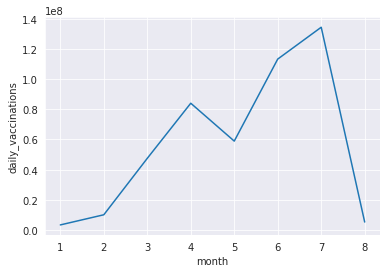

In [38]:
sns.lineplot(data=daily_vaccines_india_monthly_df, x='month', y='daily_vaccinations')

## Dataset-3 on state-wise in India:
These datasets are from 16 Jan 2021 and till date

In [40]:
statewise_india_vaccines_df = pd.read_csv('http://api.covid19india.org/csv/latest/vaccine_doses_statewise_v2.csv')
statewise_india_vaccines_df

,Vaccinated As of,State,First Dose Administered,Second Dose Administered,Total Doses Administered
0,16/01/2021,Andaman and Nicobar Islands,225,0,225
1,16/01/2021,Andhra Pradesh,18412,0,18412
2,16/01/2021,Arunachal Pradesh,829,0,829
3,16/01/2021,Assam,3528,0,3528
4,16/01/2021,Bihar,18169,0,18169
...,...,...,...,...,...
7519,02/08/2021,Uttar Pradesh,40960377,7865902,48826279
7520,02/08/2021,Uttarakhand,4626002,1464021,6090023
7521,02/08/2021,West Bengal,21459942,8789496,30249438
7522,02/08/2021,Miscellaneous,1744632,1546029,3290661


In [41]:
statewise_india_vaccines_df.rename(columns={'Vaccinated As of': 'date',
                                            'State': 'state',
                                            'First Dose Administered': 'first_dose_administered',
                                            'Second Dose Administered': 'second_dose_administered', 
                                            'Total Doses Administered': 'total_dose_administered'}, 
                                   inplace=True)

In [42]:
statewise_india_vaccines_df.head()

,date,state,first_dose_administered,second_dose_administered,total_dose_administered
0,16/01/2021,Andaman and Nicobar Islands,225,0,225
1,16/01/2021,Andhra Pradesh,18412,0,18412
2,16/01/2021,Arunachal Pradesh,829,0,829
3,16/01/2021,Assam,3528,0,3528
4,16/01/2021,Bihar,18169,0,18169


In [43]:
statewise_india_vaccines_df['month'] = pd.DatetimeIndex(statewise_india_vaccines_df.date).month

In [44]:
statewise_india_vaccines_df['date'] = pd.to_datetime(statewise_india_vaccines_df.date)

In [45]:
statewise_india_vaccines_df.head()

,date,state,first_dose_administered,second_dose_administered,total_dose_administered,month
0,2021-01-16,Andaman and Nicobar Islands,225,0,225,1
1,2021-01-16,Andhra Pradesh,18412,0,18412,1
2,2021-01-16,Arunachal Pradesh,829,0,829,1
3,2021-01-16,Assam,3528,0,3528,1
4,2021-01-16,Bihar,18169,0,18169,1


In [46]:
"""
Drop the row with 'Total'
"""

statewise_india_vaccines_df = statewise_india_vaccines_df.loc[statewise_india_vaccines_df.state != 'Total']
statewise_india_vaccines_df

,date,state,first_dose_administered,second_dose_administered,total_dose_administered,month
0,2021-01-16,Andaman and Nicobar Islands,225,0,225,1
1,2021-01-16,Andhra Pradesh,18412,0,18412,1
2,2021-01-16,Arunachal Pradesh,829,0,829,1
3,2021-01-16,Assam,3528,0,3528,1
4,2021-01-16,Bihar,18169,0,18169,1
...,...,...,...,...,...,...
7518,2021-02-08,Tripura,2384038,788884,3172922,2
7519,2021-02-08,Uttar Pradesh,40960377,7865902,48826279,2
7520,2021-02-08,Uttarakhand,4626002,1464021,6090023,2
7521,2021-02-08,West Bengal,21459942,8789496,30249438,2


In [47]:
list(statewise_india_vaccines_df.state.unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal',
 'Miscellaneous']

In [48]:
state_with_high_vaccines = statewise_india_vaccines_df.groupby('state').agg({'first_dose_administered': 'mean'}).sort_values(by='first_dose_administered', ascending=False)
state_with_high_vaccines

,first_dose_administered
state,
Maharashtra,1.285643e+07
Uttar Pradesh,1.248250e+07
Rajasthan,1.021063e+07
Gujarat,9.819852e+06
Karnataka,8.569930e+06
West Bengal,8.272163e+06
Madhya Pradesh,8.062365e+06
Bihar,6.648267e+06
Tamil Nadu,5.822774e+06


Q: Which are the top 5 states have highest fully vaccinated population:

A:
1. Maharashtra > Top-1
2. Uttar Pradesh > Top-2
3. Rajasthan > Top-3
4. Gujarat > Top-4
5. Karnataka > Top-5

In [49]:
states_with_high_vaccines = statewise_india_vaccines_df.groupby(['state']).agg({'first_dose_administered': 'sum', 
                                                                                'second_dose_administered': 'sum'}).sort_values(by='first_dose_administered', ascending=False)
states_with_high_vaccines.head(10)

,first_dose_administered,second_dose_administered
state,,
Maharashtra,2545573694,630232450
Uttar Pradesh,2471535709,492665780
Rajasthan,2021705331,435281051
Gujarat,1944330604,539192893
Karnataka,1696846152,376237451
West Bengal,1637888317,523289440
Madhya Pradesh,1596348235,277970389
Bihar,1316356850,241247319
Tamil Nadu,1152909191,259654367


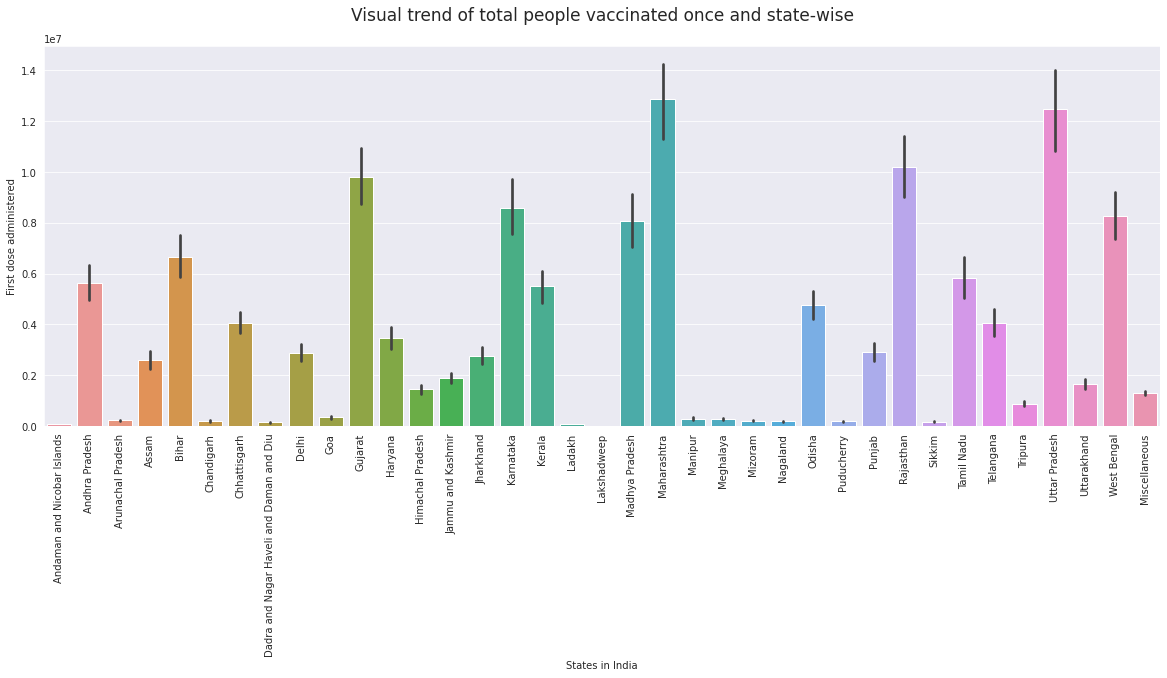

In [50]:
plt.figure(figsize=(20,7))

sns.barplot(data=statewise_india_vaccines_df, 
            x='state', 
            y='first_dose_administered')

plt.xlabel('States in India')
plt.ylabel('First dose administered')
plt.title('Visual trend of total people vaccinated once and state-wise', fontsize=17, y=1.05)
plt.xticks(rotation=90)
plt.show()

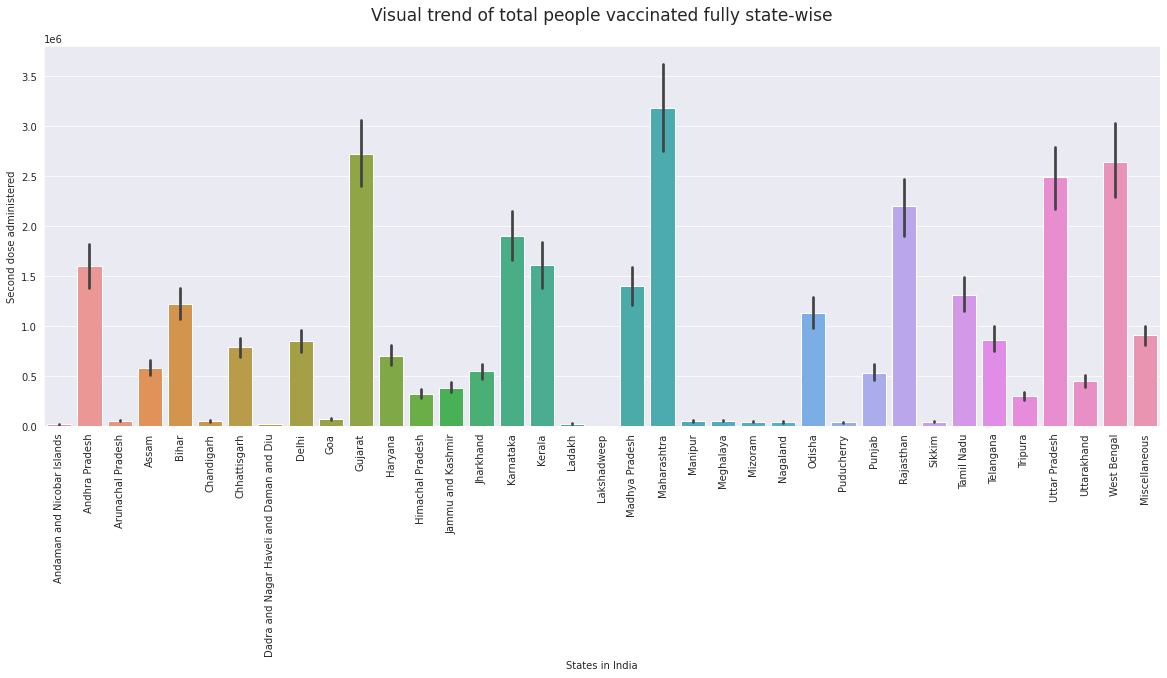

In [51]:
plt.figure(figsize=(20,7))

sns.barplot(data=statewise_india_vaccines_df, 
            x='state', 
            y='second_dose_administered')

plt.xlabel('States in India')
plt.ylabel('Second dose administered')
plt.title('Visual trend of total people vaccinated fully state-wise', fontsize=17, y=1.05)
plt.xticks(rotation=90)
plt.show()

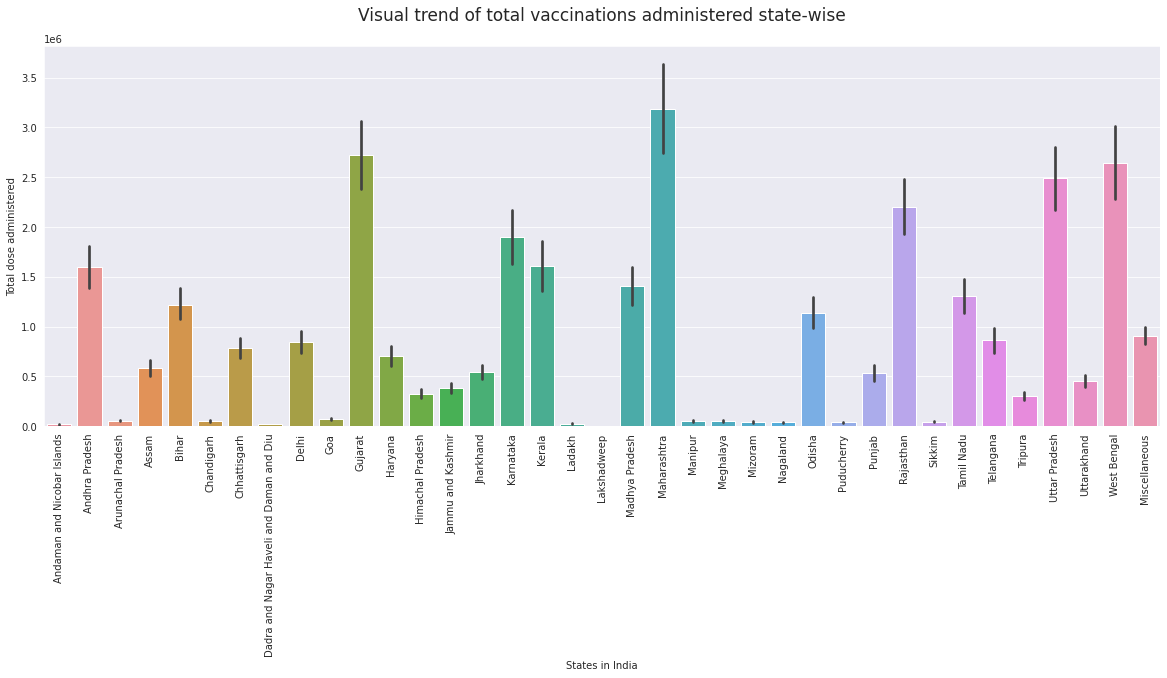

In [52]:
plt.figure(figsize=(20,7))

sns.barplot(data=statewise_india_vaccines_df, 
            x='state', 
            y='second_dose_administered')

plt.xlabel('States in India')
plt.ylabel('Total dose administered')
plt.title('Visual trend of total vaccinations administered state-wise', fontsize=17, y=1.05)
plt.xticks(rotation=90)
plt.show()


In [53]:
"""
Pivot table using Pandas
"""

statewise_vaccinations_pivot = pd.pivot_table(statewise_india_vaccines_df, 
                                    values=['first_dose_administered', 'second_dose_administered', 'total_dose_administered', 'month'], 
                                    columns='state', 
                                    aggfunc={
                                        'first_dose_administered': np.sum,
                                        'second_dose_administered': np.sum,
                                        'total_dose_administered': np.sum
                                    }, 
                                    fill_value=0)

statewise_vaccinations_pivot


state,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Ladakh,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Miscellaneous,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
first_dose_administered,14971289,1112379770,44315282,515931904,1316356850,40104621,802974690,30049098,572359798,68389417,1944330604,688251215,287404804,374831223,545776308,1696846152,1088657266,16493089,4028286,1596348235,2545573694,59691090,55876870,256190839,43389643,38278875,942520044,37267853,576205292,2021705331,33538843,1152909191,802421157,176154950,2471535709,328667202,1637888317
second_dose_administered,3484031,316553353,10656562,115839458,241247319,10095864,155996012,4087106,167880397,14130996,539192893,139305854,64657823,75932092,108249756,376237451,319401290,4968916,960120,277970389,630232450,10281706,10554603,180050985,8577840,8157724,224184320,7561290,106092024,435281051,8668733,259654367,171017535,59707616,492665780,89127943,523289440
total_dose_administered,18455320,1428933123,54971844,631771362,1557604169,50200485,958970702,34136204,740240195,82520413,2483523497,827557069,352062627,450763315,654026064,2073083603,1408058556,21462005,4988406,1874318624,3175806144,69972796,66431473,436241824,51967483,46436599,1166704364,44829143,682297316,2456986382,42207576,1412563558,973438692,235862566,2964201489,417795145,2161177757


# Summary
### Insights from the above analysis and graphs:
1. Vaccinations in India started from 15th January 2021

2. Vaccinations were beginned with two types: Covaxin, Oxford/AstraZeneca

3. From June onwards Sputnik V has been given along with Covaxin, Oxford/AstraZeneca

4. Total daily vaccinations given every month country-wise India:

  Jan -> 3379485.0

  Feb -> 10103631.0

  March -> 47519159.0

  Apr -> 84035890.0

  May -> 58936437.0

  June -> 113298089.0

  July -> 90848206.0

5. Top 5 states in India having more fully vaccinated population:

  Maharashtra > Top-1

  Uttar Pradesh > Top-2

  Rajasthan > Top-3

  Gujarat > Top-4
  
  Karnataka > Top-5